## Imports

In [1]:
# Required for autocnet imports
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'

# Autocnet Imports
from autocnet.graph.network import NetworkCandidateGraph

# Helpful Python Modules
import matplotlib.pyplot as plt  #     plotting package
import numpy as np               #     numerical computing package

## Ingestion of network for analysis outside of DB

#### If you just want to explore your network without the benefit of DB queries, you can ingest the network into a pandas DataFrame

In [2]:
from plio.io.io_controlnetwork import from_isis

cnet_path = '/work/projects/kaguya/ladoramkershner/Control/imagenet/Ground/grounded_rr_jig1_ERR_PROP.net'
cnet_df = from_isis(cnet_path)

In [3]:
# Preview of the Data
cnet_df.head()

,id,pointType,pointChoosername,pointDatetime,pointEditLock,pointIgnore,pointJigsawRejected,referenceIndex,aprioriSurfPointSource,aprioriSurfPointSourceFile,...,measureDatetime,measureEditLock,measureIgnore,measureJigsawRejected,diameter,apriorisample,aprioriline,samplesigma,linesigma,measureLog
0,TC2W2B0_01_05183N276E0073_bndry_8_kag_ap15,2,cnetadd,2020-02-21T10:48:15,False,False,False,0,2,,...,2020-02-21T10:48:15,False,False,False,0.0,-0.500000,-0.500000,0.0,0.0,[]
1,TC2W2B0_01_05183N276E0073_bndry_8_kag_ap15,2,cnetadd,2020-02-21T10:48:15,False,False,False,0,2,,...,2020-02-21T10:48:15,False,False,False,0.0,715.132345,4141.660587,0.0,0.0,"[MinimumPixelZScore: -0.8449085761572315, Maxi..."
2,TC2W2B0_01_05183N276E0073_bndry_8_kag_ap15,2,cnetadd,2020-02-21T10:48:15,False,False,False,0,2,,...,2020-02-21T10:48:15,False,False,False,0.0,715.279270,53.494950,0.0,0.0,"[MinimumPixelZScore: -0.8449085761572315, Maxi..."
3,TC2W2B0_01_05183N276E0073_bndry_8_kag_ap15,2,cnetadd,2020-02-21T10:48:15,False,False,False,0,2,,...,2020-02-21T10:48:15,False,False,False,0.0,3833.369156,4174.652836,0.0,0.0,"[MinimumPixelZScore: -0.8449085761572315, Maxi..."
4,TC2W2B0_01_05183N276E0073_bndry_8_kag_ap15,2,cnetadd,2020-02-21T10:48:15,False,False,False,0,2,,...,2020-02-21T10:48:15,False,False,False,0.0,3833.369178,86.651571,0.0,0.0,"[MinimumPixelZScore: -0.8449085761572315, Maxi..."


In [4]:
# Exhaustive list of available data columns
cnet_df.columns

Index(['id', 'pointType', 'pointChoosername', 'pointDatetime', 'pointEditLock',
       'pointIgnore', 'pointJigsawRejected', 'referenceIndex',
       'aprioriSurfPointSource', 'aprioriSurfPointSourceFile',
       'aprioriRadiusSource', 'aprioriRadiusSourceFile', 'latitudeConstrained',
       'longitudeConstrained', 'radiusConstrained', 'aprioriX', 'aprioriY',
       'aprioriZ', 'aprioriCovar', 'adjustedX', 'adjustedY', 'adjustedZ',
       'adjustedCovar', 'pointLog', 'serialnumber', 'measureType', 'sample',
       'line', 'sampleResidual', 'lineResidual', 'measureChoosername',
       'measureDatetime', 'measureEditLock', 'measureIgnore',
       'measureJigsawRejected', 'diameter', 'apriorisample', 'aprioriline',
       'samplesigma', 'linesigma', 'measureLog'],
      dtype='object')

In [5]:
cnet_df[["lineResidual","sampleResidual"]].describe()

,lineResidual,sampleResidual
count,127791.000000,127791.000000
mean,0.000018,-0.000005
std,0.218852,0.271797
min,-2.037028,-1.813218
25%,-0.109329,-0.159428
50%,-0.000280,0.000647
75%,0.110321,0.158499
max,1.868503,1.857513


In [6]:
cnet_df.loc[cnet_df["lineResidual"]>1].describe()

,pointType,referenceIndex,aprioriSurfPointSource,aprioriRadiusSource,aprioriX,aprioriY,aprioriZ,adjustedX,adjustedY,adjustedZ,measureType,sample,line,sampleResidual,lineResidual,diameter,apriorisample,aprioriline,samplesigma,linesigma
count,232.000000,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.000000,232.000000,232.0,232.0
mean,2.030172,0.012931,2.120690,2.090517,1.580024e+06,107987.686372,704589.312932,1.580117e+06,108070.293150,704380.231898,2.948276,1902.869146,2597.974823,0.020947,1.258120,0.0,1849.700417,2548.152273,0.0,0.0
std,0.171431,0.113221,0.685725,0.514294,3.190015e+04,77996.998147,66260.263474,3.190836e+04,78017.547944,66262.156083,0.391353,1320.315070,1619.308603,0.421322,0.227402,0.0,1313.812249,1647.253246,0.0,0.0
min,2.000000,0.000000,2.000000,2.000000,1.487051e+06,-47667.927012,591235.931659,1.487267e+06,-47753.354993,591026.287670,0.000000,5.776812,5.479192,-1.344015,1.001441,0.0,-0.500000,-0.500000,0.0,0.0
25%,2.000000,0.000000,2.000000,2.000000,1.560087e+06,46156.428634,658084.942570,1.560166e+06,46161.086235,658100.536003,3.000000,628.663097,1081.348684,-0.208538,1.085565,0.0,611.637255,987.731060,0.0,0.0
50%,2.000000,0.000000,2.000000,2.000000,1.586724e+06,122949.834988,695489.316544,1.586879e+06,123142.295958,695164.129336,3.000000,1947.427382,2843.005324,0.047050,1.190890,0.0,1928.489992,2752.322157,0.0,0.0
75%,2.000000,0.000000,2.000000,2.000000,1.603126e+06,173803.370467,748048.648322,1.603285e+06,173889.507256,747955.241302,3.000000,3146.630403,4109.715699,0.286037,1.376353,0.0,3043.880969,4111.017370,0.0,0.0
max,3.000000,1.000000,6.000000,5.000000,1.631982e+06,236515.648328,893938.899032,1.632044e+06,236568.201030,893572.080666,3.000000,4084.629952,4650.011513,1.105866,1.868503,0.0,4083.809482,4651.558629,0.0,0.0


#### Visualize Residuals

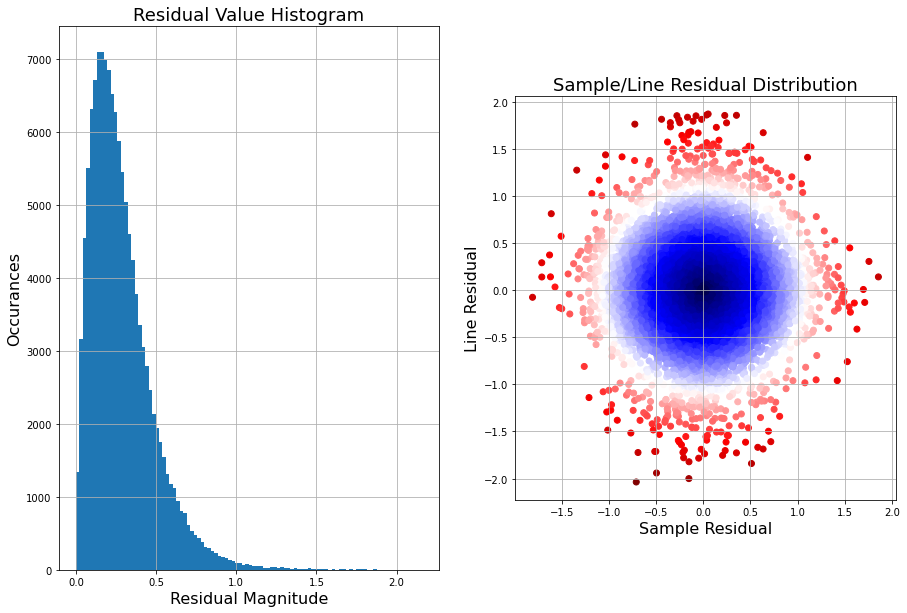

In [17]:
# list comprehension to resolve line/sample residuals
res = [np.linalg.norm((i, j)) for i, j in zip(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values)]


# Example Plot 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].hist(res, bins=100);
axs[0].grid();
axs[0].set_xlabel('Residual Magnitude', size=16);
axs[0].set_ylabel('Occurances', size=16);
axs[0].set_title('Residual Value Histogram', size=18);

point_color=np.array([0,0,1,0.01])
point_colors=res/np.max(res)
axs[1].scatter(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values, c=point_colors, cmap="seismic");
axs[1].grid();
axs[1].set_aspect("equal")
axs[1].set_xlabel('Sample Residual', size=16);
axs[1].set_ylabel('Line Residual', size=16);
axs[1].set_title('Sample/Line Residual Distribution', size=18);


## Config

-Configuration files in AutoCNet can run in two ways.  

-The first is as a dictionary.  In dictionary, you can have nested dictionaries (values of dictionaries are other dictionaries).  
-This next cell took the config.yml file, read it in, and converted it to a dictionary.  

-The second way is just to put the file name directly in.

In [8]:
# Config setup option 1
from autocnet.config_parser import parse_config

config_path = 'config.yml'
config = parse_config(config_path)

In [11]:
import pprint
pprint.pprint(config)

{'cluster': {'cluster_log_dir': '/logs',
             'cluster_submission': 'slurm',
             'extractor_memory': 8192,
             'maxfailures': 3,
             'processing_memory': 1024,
             'queue': 'shortall',
             'tmp_scratch_dir': '/scratch'},
 'database': {'host': 'autocnet.wr.usgs.gov',
              'name': 'bhw_isis_ingest_tutorial',
              'password': 'abcde',
              'pgbouncer_port': 30001,
              'port': 5432,
              'timeout': 500,
              'type': 'postgresql',
              'username': 'jay'},
 'directories': {'vrt_dir': '/scratch/vrts'},
 'env': {'ISISDATA': '/usgs/cpkgs/isis3/data',
         'ISISROOT': '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0',
         'conda': 'autocnet'},
 'pfeffernusse': {'url': 'http://pfeffer.wr.usgs.gov/v1/pds'},
 'redis': {'basename': 'bhw_ISISingest',
           'completed_queue': 'bhw_ii:done',
           'host': 'localhost',
           'port': '8084',
           'processing_queue'

## Ingest Database

-cnet_path is the path to the control network. 

-lis_path is the path to the image files.  

-Image files need to have footprintinit run on all of them prior to ingestion by autocnet.

In [12]:
cnet_path = "/work/projects/kaguya/ladoramkershner/Control/imagenet/Ground/grounded_rr_jig1_ERR_PROP.net"

lis_path = "/scratch/jmapel/autocnet_tut/cubes.lis"

-Next cell is the real meat, ingesting the images. 

-This cell paths to the list file, then to the config file, and dumps the contents of the database if it already exists (clear_db=TRUE). 

-This cell also computes another command to find all overlaping regions for the images.  

-This can all be done in parallal to speed up processing time.

In [13]:
ncg = NetworkCandidateGraph.from_filelist(lis_path, config, clear_db=True)

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/autocnet-0.2.6-py3.7.egg/autocnet/graph/network.py:2119: UserWarning: Failed to reset primary id sequence for table costs
  warnings.warn(f'Failed to reset primary id sequence for table {t}')


loading 1 of 375


/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1997: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay should include sync_backref=False set on the Overlay.points relationship.  (this warning may be suppressed after 10 occurrences)
  (rel_b, rel_a, rel_b),
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1997: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points should include sync_backref=False set on the Points.overlay relationship.  (this warning may be suppressed after 10 occurrences)
  (rel_b, rel_a, rel_b),


loading 2 of 375
loading 3 of 375
loading 4 of 375
loading 5 of 375
loading 6 of 375
loading 7 of 375
loading 8 of 375
loading 9 of 375
loading 10 of 375
loading 11 of 375
loading 12 of 375
loading 13 of 375
loading 14 of 375
loading 15 of 375
loading 16 of 375
loading 17 of 375
loading 18 of 375
loading 19 of 375
loading 20 of 375
loading 21 of 375
loading 22 of 375
loading 23 of 375
loading 24 of 375
loading 25 of 375
loading 26 of 375
loading 27 of 375
loading 28 of 375
loading 29 of 375
loading 30 of 375
loading 31 of 375
loading 32 of 375
loading 33 of 375
loading 34 of 375
loading 35 of 375
loading 36 of 375
loading 37 of 375
loading 38 of 375
loading 39 of 375
loading 40 of 375
loading 41 of 375
loading 42 of 375
loading 43 of 375
loading 44 of 375
loading 45 of 375
loading 46 of 375
loading 47 of 375
loading 48 of 375
loading 49 of 375
loading 50 of 375
loading 51 of 375
loading 52 of 375
loading 53 of 375
loading 54 of 375
loading 55 of 375
loading 56 of 375
loading 57 of 375


-This cell just checks that there are images in the database, it should spit out a number.

In [14]:
# Quick Check there are images in the DB
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Images).count()
    print(res)

375


-At this point, it is worth checking autocnet to make sure the images have loaded correctly.

-Go to: autocnet.wr.usgs.gov  (pg admin). In pg admin, go to your database/schemas/tables/images and right-click images.  Select the query tool.  

-Write some simple code to get everything for the image table (select * from images) and press the lightning bolt button.  

-Click the eyeball next to the geom column and it should show the image footprints.

-The next cell is to injest the control points for the images.  

-There will be some warnings that can be ignored for now.  This block takes about ~40 minutes to run.

In [ ]:
ncg = NetworkCandidateGraph.from_cnet(cnet_path, lis_path, config)

In [ ]:
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Points).all()
    print(len(res))
    for i in range(0,11):
        print(f'point {res[i].id} geom: ', res[i].geom)